**Dataset Description**

The dataset consists of several predictor variables and one target variable, Diagnosis. The target variable has values 'Benign' and 'Malignant', where 'Benign' means that the cells are not harmful or there is no cancer and 'Malignant' means that the patient has cancer and the cells have a harmful effect

Number of instances: 569

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information

ID number

Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

radius (mean of distances from center to points on the perimeter)

texture (standard deviation of gray-scale values)

perimeter

area

smoothness (local variation in radius lengths)

compactness (perimeter^2 / area - 1.0)

concavity (severity of concave portions of the contour)

concave points (number of concave portions of the contour)

symmetry

fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

1. DATA COLLECTION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/content/breast_cancer.csv')

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Domain Analysis**

1. Diagnosis
Refers to the result of a breast cancer screening, typically indicating whether a tumor is benign 'B' (non-cancerous) or malignant 'M' (cancerous).


Features Related to Tumor Measurements:
These measurements are calculated from imaging data (e.g., mammograms) and describe the physical characteristics of a breast mass.

2. Radius Mean
The average distance from the center to the edge of the tumor. It indicates the size of the tumor.
3. Texture Mean
Describes the variation in the gray levels (texture) within the tumor region, indicating uniformity or coarseness.
4. Perimeter Mean
The average perimeter of the tumor, which is the boundary length.
5. Area Mean
The average area covered by the tumor, typically measured in square units.
6. Smoothness Mean
Refers to the smoothness of the tumor’s surface, which measures changes in the radius lengths.
7. Compactness Mean
A combination of perimeter and area, defined as (Perimeter^2)/Area, indicating how compact the tumor is.
8. Concavity Mean
The average severity of concave (inward-curving) portions of the tumor’s boundary.
9. Concave Points Mean
The number of points on the tumor boundary that are concave.
10. Symmetry Mean
Indicates how symmetrical the tumor is in shape.
11. Fractal Dimension Mean
Measures complexity of the tumor boundary. Higher values indicate more irregular or jagged boundaries.


Standard Error Features (SE)
These describe the variability or uncertainty in the corresponding measurements.

12. Radius SE, Texture SE, Perimeter SE, Area SE, etc.
Standard error values of the respective features, giving an estimate of the variability in those measurements.

Worst Features
These capture the largest or most extreme values for the respective features.

13. Radius Worst, Texture Worst, Perimeter Worst, Area Worst, etc.
Represent the worst (i.e., largest, least favorable) measurements of each respective feature within a tumor.
14. Smoothness Worst, Compactness Worst, Concavity Worst, Concave Points Worst, Symmetry Worst, Fractal Dimension Worst
These features provide the worst-case estimates for smoothness, compactness, etc., which could indicate more aggressive tumor growth.

In [7]:
data=data.drop(['id','Unnamed: 32'],axis=1)

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**EDA**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [13]:
data.duplicated().sum()

0

In [14]:
data.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


In [15]:
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


**DATA VISUALIZATION**

In [16]:
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')

Text(0.5, 0, 'Diagnosis')

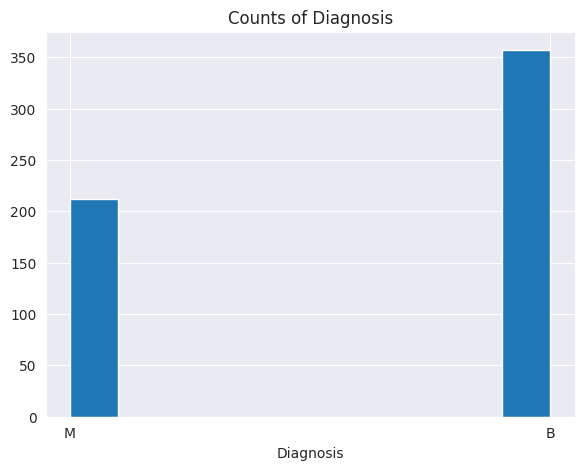

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(data.diagnosis)

plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")


**observation**

M = Malignant

B = Benign

From the count plot, it can be easily inferred that there are more BENIGN diagnosed data points than MALIGNANT diagnosed data points



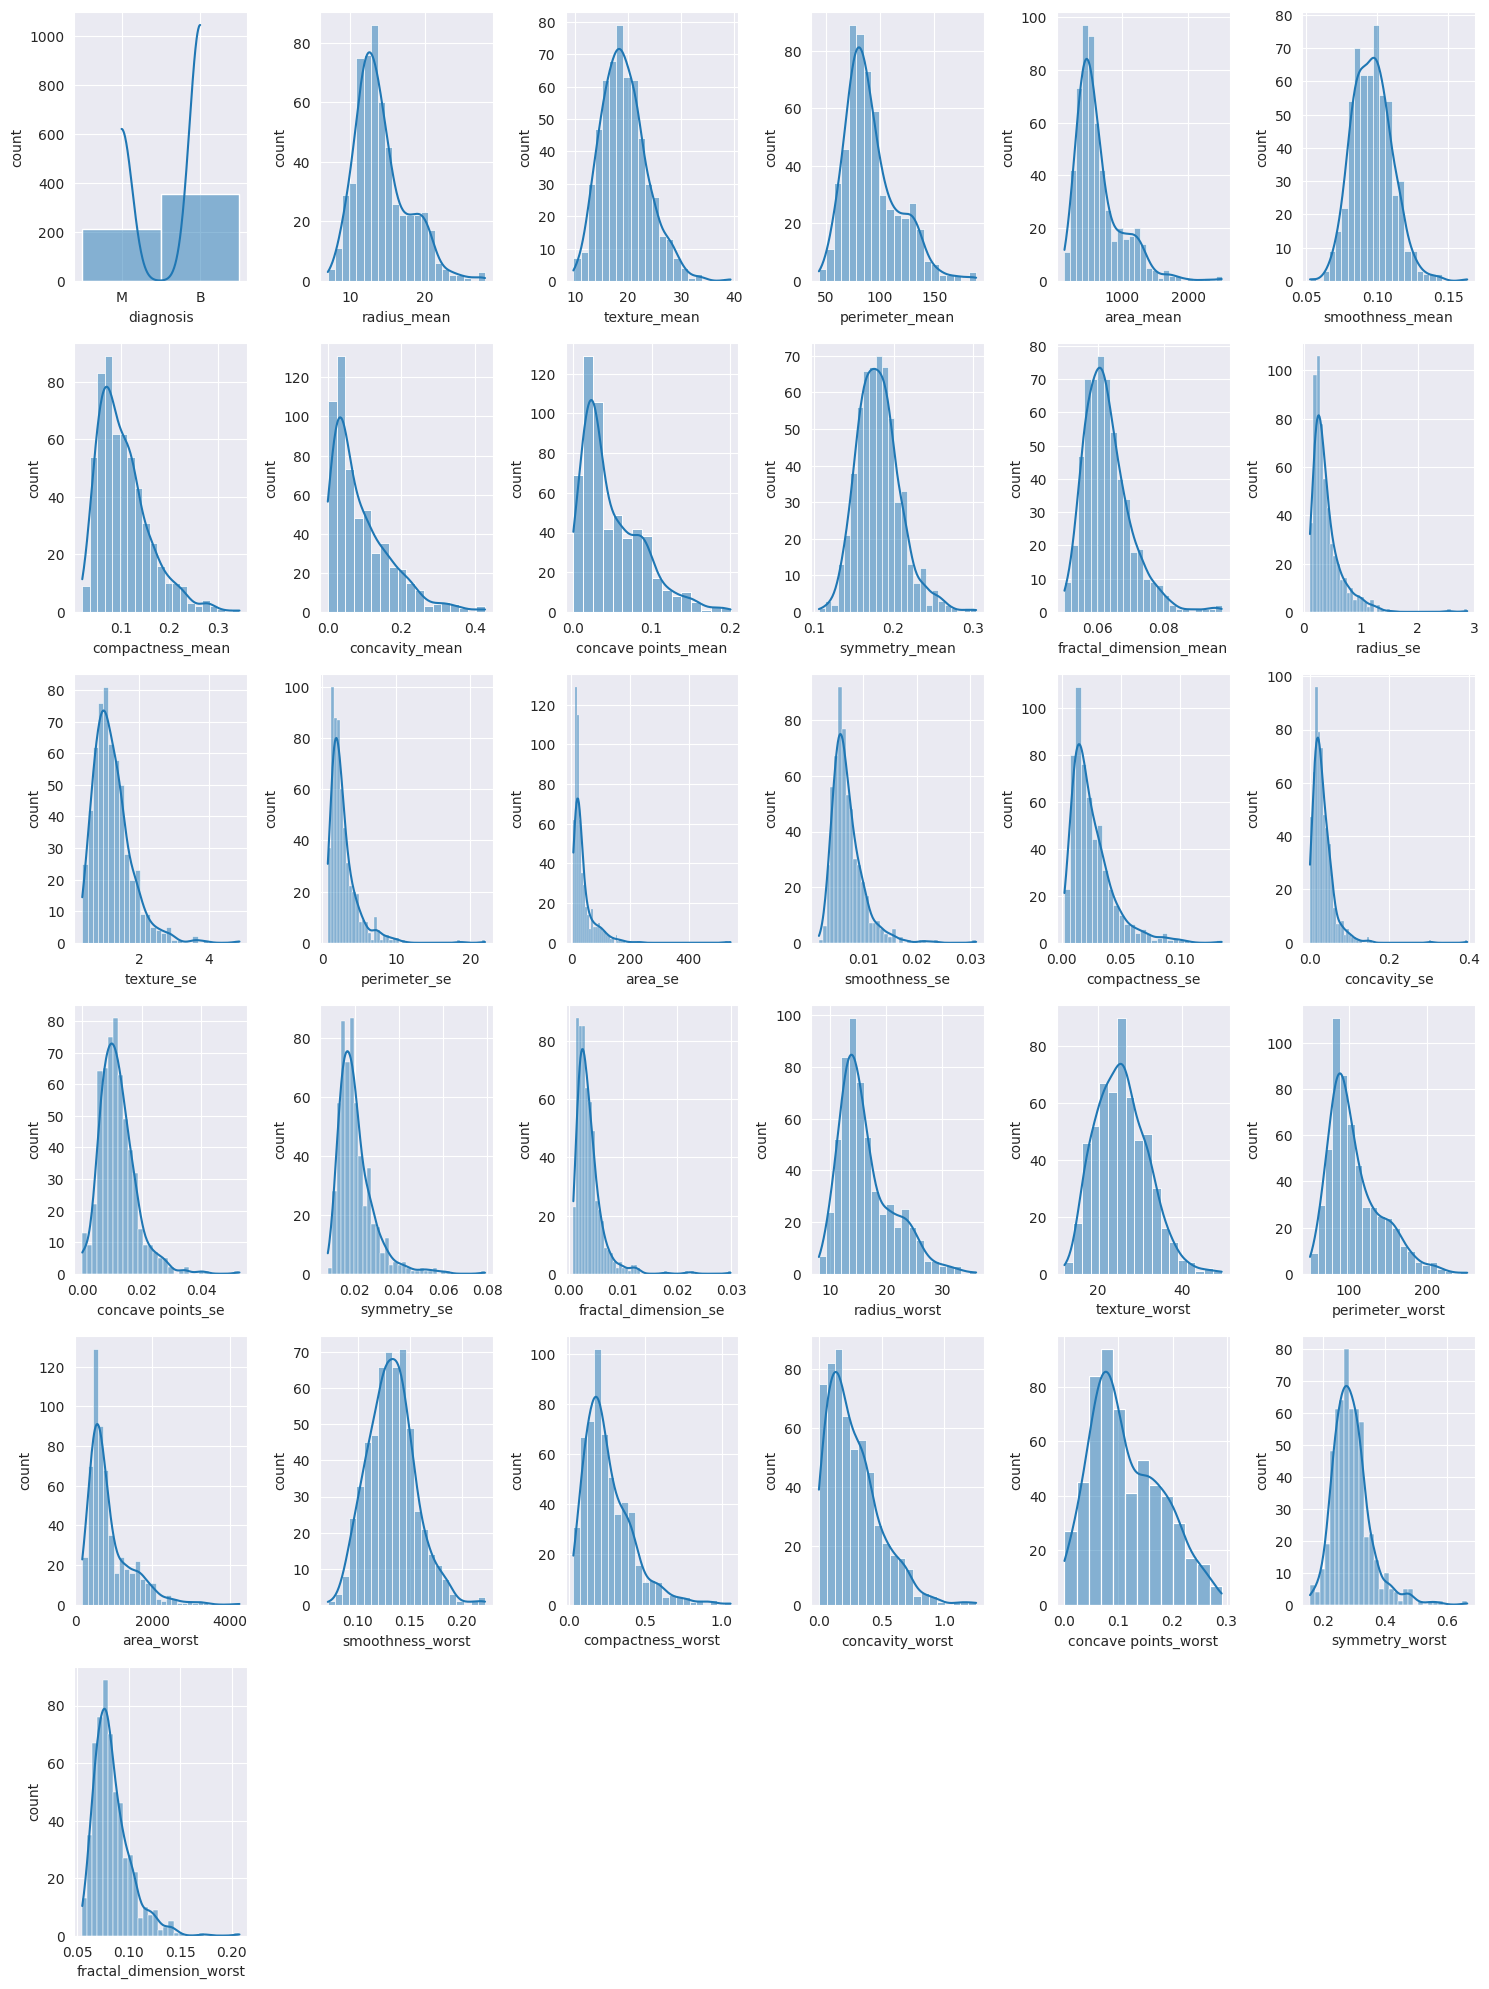

In [ ]:
plt.figure(figsize=(15,20))
plotnum=1
for column in data:
    if plotnum <= len(data.columns):
        ax=plt.subplot(6,6,plotnum)
        sns.histplot(x=data[column],kde=True,ax=ax)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count')
    plotnum += 1
plt.tight_layout()

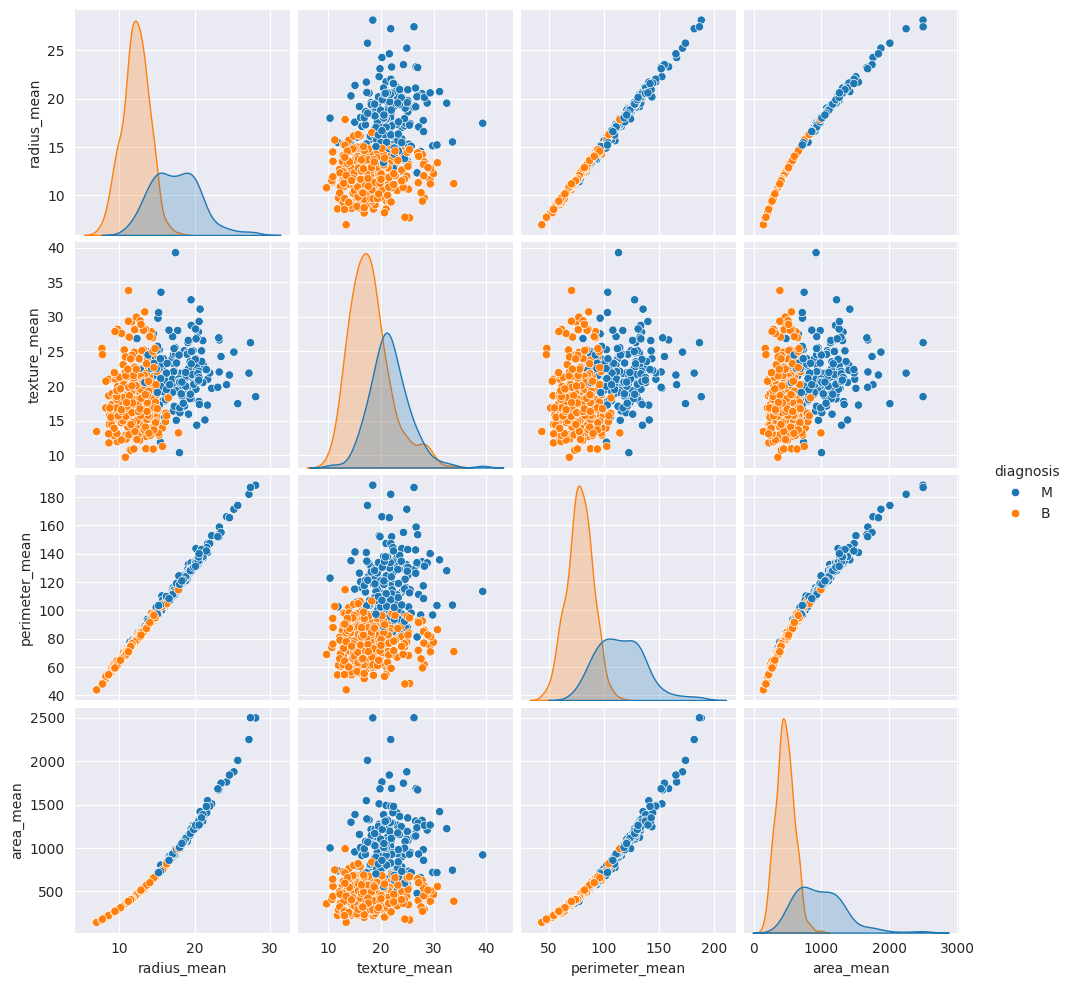

In [20]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()




The visuals show a trend that has been followed throughout each plot. At lower values of the features, the diagnosis is predominantly BENIGN and at higher values, MALIGNANT has been the chief diagnosis.



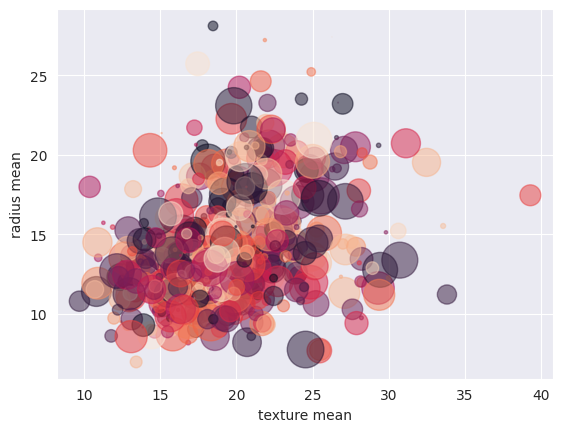

In [22]:
size = len(data['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean")
plt.scatter(data['texture_mean'], data['radius_mean'], s=area, c=colors, alpha=0.5);

In [23]:
# maping  Benign = 0 , Malignant = 1
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

In [24]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
data1=data.copy()

In [26]:
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
# Processing Outliers

In [28]:
Q1=data1.quantile(0.25)
Q3=data1.quantile(0.75)
IQR=Q3-Q1
print(IQR)

diagnosis                    1.000000
radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_

In [29]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

diagnosis                   -1.500000
radius_mean                  5.580000
texture_mean                 7.725000
perimeter_mean              31.775000
area_mean                 -123.300000
smoothness_mean              0.057975
compactness_mean            -0.033300
concavity_mean              -0.122150
concave points_mean         -0.060225
symmetry_mean                0.111200
fractal_dimension_mean       0.045070
radius_se                   -0.137350
texture_se                  -0.126250
perimeter_se                -1.020500
area_se                    -23.160000
smoothness_se                0.000703
compactness_se              -0.015975
concavity_se                -0.025350
concave points_se           -0.002970
symmetry_se                  0.002680
fractal_dimension_se        -0.001217
radius_worst                 4.340000
texture_worst                8.120000
perimeter_worst             22.175000
area_worst                -337.750000
smoothness_worst             0.072500
compactness_

In [32]:
(data1<lower_limit)|(data1>upper_limit)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,True,True,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,True,...,False,False,False,False,True,True,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,True,True,False,False,True


In [33]:
percentage=(data1<lower_limit).sum()/len(data1)*100+(data1>upper_limit).sum()/len(data1)*100
print(percentage)

diagnosis                   0.000000
radius_mean                 2.460457
texture_mean                1.230228
perimeter_mean              2.284710
area_mean                   4.393673
smoothness_mean             1.054482
compactness_mean            2.811951
concavity_mean              3.163445
concave points_mean         1.757469
symmetry_mean               2.636204
fractal_dimension_mean      2.636204
radius_se                   6.678383
texture_se                  3.514938
perimeter_se                6.678383
area_se                    11.423550
smoothness_se               5.272408
compactness_se              4.920914
concavity_se                3.866432
concave points_se           3.339192
symmetry_se                 4.745167
fractal_dimension_se        4.920914
radius_worst                2.987698
texture_worst               0.878735
perimeter_worst             2.636204
area_worst                  6.151142
smoothness_worst            1.230228
compactness_worst           2.811951
c

In [35]:
print(percentage[percentage<5])

diagnosis                  0.000000
radius_mean                2.460457
texture_mean               1.230228
perimeter_mean             2.284710
area_mean                  4.393673
smoothness_mean            1.054482
compactness_mean           2.811951
concavity_mean             3.163445
concave points_mean        1.757469
symmetry_mean              2.636204
fractal_dimension_mean     2.636204
texture_se                 3.514938
compactness_se             4.920914
concavity_se               3.866432
concave points_se          3.339192
symmetry_se                4.745167
fractal_dimension_se       4.920914
radius_worst               2.987698
texture_worst              0.878735
perimeter_worst            2.636204
smoothness_worst           1.230228
compactness_worst          2.811951
concavity_worst            2.108963
concave points_worst       0.000000
symmetry_worst             4.042179
fractal_dimension_worst    4.217926
dtype: float64


In [36]:
col=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean',
     'concave points_mean','symmetry_mean','fractal_dimension_mean','texture_se','compactness_se','concavity_se','concave points_se',
     'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','smoothness_worst','compactness_worst',
     'compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
for i in col:
  data1.loc[data1[i]<lower_limit[i],i]=data1[i].median()

In [37]:
for i in col:
  data1.loc[data1[i]>upper_limit[i],i]=data1[i].median()

In [41]:
percentage=(data1<lower_limit).sum()/len(data1)*100+(data1>upper_limit).sum()/len(data1)*100
percentage[percentage<5]

,0
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0
symmetry_mean,0.0


In [42]:
# Scaling

In [45]:
data1.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [48]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df=sc.fit_transform(data1)
df1=pd.DataFrame(df,columns=['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])
df1.shape

(569, 31)

In [49]:
data1.shape

(569, 31)

In [50]:
data1[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]=df1

In [51]:
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.745413,0.033070,0.763308,0.725159,0.787294,0.350445,0.219004,0.967763,0.969040,...,0.899948,0.178009,0.983870,0.450698,0.756189,0.309017,0.921315,0.912027,0.485516,0.948040
1,1.0,0.920103,0.397828,0.860883,1.000000,0.313143,0.283514,0.309253,0.461645,0.499226,...,0.879835,0.381830,0.794706,0.435214,0.397478,0.266668,0.312670,0.639175,0.457706,0.504454
2,1.0,0.860519,0.569595,0.832866,0.895983,0.663333,0.672280,0.702491,0.841447,0.698142,...,0.806601,0.452900,0.748515,0.374508,0.589911,0.664887,0.582891,0.835052,0.791039,0.483076
3,1.0,0.300562,0.526654,0.326442,0.205159,0.469925,0.350445,0.859075,0.692105,0.483746,...,0.359979,0.485417,0.355305,0.094008,0.467539,0.309017,0.888961,0.884880,0.485516,0.371140
4,1.0,0.901144,0.228529,0.882137,0.975476,0.532328,0.542627,0.704626,0.686184,0.496904,...,0.753481,0.155883,0.746316,0.341575,0.524521,0.297467,0.517665,0.558419,0.308613,0.322743


**FEATURE SELECTION**

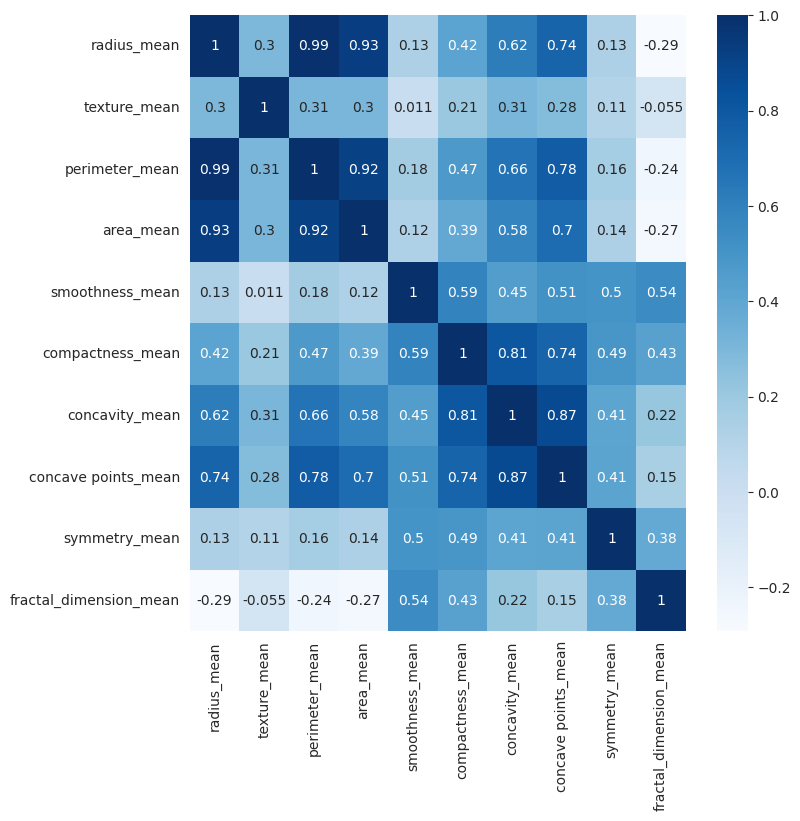

In [53]:
data1_corr = data1.iloc[:, 1:11].corr()
plt.figure(figsize=(8,8))
sns.heatmap(data1_corr, cmap="Blues", annot=True)
plt.show()

observation

*As it was expected there are very strong correlations between radius, perimeter and area.

*Compactness, concavity and and concave points are also highly correlated. These highly correlated features result in redundant information. It is suggested to remove highly correlated features to avoid a predictive bias for the information contained in these features.

In [54]:
x=data1.drop('diagnosis',axis=1)
y=data1['diagnosis']

In [55]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.745413,0.033070,0.763308,0.725159,0.787294,0.350445,0.219004,0.967763,0.969040,1.000000,...,0.899948,0.178009,0.983870,0.450698,0.756189,0.309017,0.921315,0.912027,0.485516,0.948040
1,0.920103,0.397828,0.860883,1.000000,0.313143,0.283514,0.309253,0.461645,0.499226,0.233391,...,0.879835,0.381830,0.794706,0.435214,0.397478,0.266668,0.312670,0.639175,0.457706,0.504454
2,0.860519,0.569595,0.832866,0.895983,0.663333,0.672280,0.702491,0.841447,0.698142,0.348870,...,0.806601,0.452900,0.748515,0.374508,0.589911,0.664887,0.582891,0.835052,0.791039,0.483076
3,0.300562,0.526654,0.326442,0.205159,0.469925,0.350445,0.859075,0.692105,0.483746,0.402783,...,0.359979,0.485417,0.355305,0.094008,0.467539,0.309017,0.888961,0.884880,0.485516,0.371140
4,0.901144,0.228529,0.882137,0.975476,0.532328,0.542627,0.704626,0.686184,0.496904,0.308522,...,0.753481,0.155883,0.746316,0.341575,0.524521,0.297467,0.517665,0.558419,0.308613,0.322743


In [56]:
y.head()

,diagnosis
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm,y_sm=smote.fit_resample(x_train, y_train)
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_sm))

Actual Classes Counter({0.0: 286, 1.0: 169})
SMOTE Classes Counter({0.0: 286, 1.0: 286})


In [60]:
#classifiers

In [74]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model = svm.SVC()
model.fit(x_train,y_train)

SVC()

In [75]:
x_train_prediction = model.predict(x_train)
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score,precision_score
training_data_accuracy =accuracy_score(y_train,x_train_prediction)
print('Accuracy of training data = ',training_data_accuracy)

Accuracy of training data =  0.989010989010989


In [76]:
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Accuracy of training data = ', testing_data_accuracy)

Accuracy of training data =  0.9736842105263158


In [77]:
print(classification_report(y_test, x_test_prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Accuracy score = 97%

In [87]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
print('Precision Score: {}'.format(precision_score(y_test,x_test_prediction)));
cm = confusion_matrix(y_test, x_test_prediction)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)


Precision Score: 0.9761904761904762
Sensitivity :  0.9859154929577465
Specificity :  0.9534883720930233


In [89]:
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(y_test, x_test_prediction)))


ROC AUC Score: 0.9697019325253848


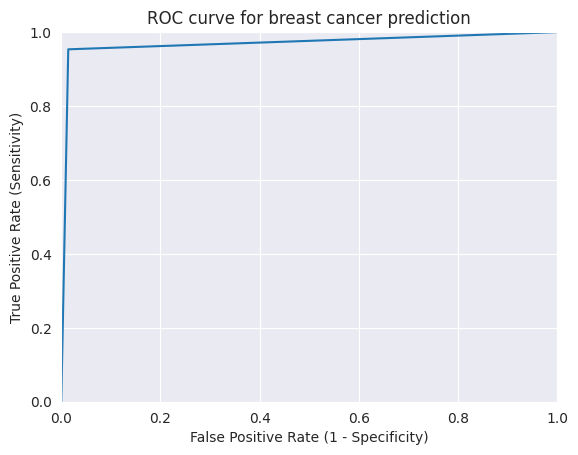

In [90]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,x_test_prediction)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

**HYPER-PARAMETER TUNING**

In [91]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
model = svm.SVC()
pipeline = Pipeline([('scaler', scaler), ('svc', model)])

# Hyperparameter grid
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100, 1000],
    'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__class_weight': [None, 'balanced']
}

grid = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, scoring='f1', cv=10)
grid.fit(x, y)



Fitting 10 folds for each of 288 candidates, totalling 2880 fits
[CV] END svc__C=0.01, svc__class_weight=None, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=0.01, svc__class_weight=None, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=0.01, svc__class_weight=None, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=0.01, svc__class_weight=None, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=0.01, svc__class_weight=None, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=0.01, svc__class_weight=None, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=0.01, svc__class_weight=None, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=0.01, svc__class_weight=None, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=0.01, svc__class_weight=None, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=0.01, svc__class_weight=None

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'svc__class_weight': [None, 'balanced'],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1', verbose=2)

In [116]:
# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Parameters: {'svc__C': 0.01, 'svc__class_weight': 'balanced', 'svc__gamma': 1, 'svc__kernel': 'linear'}
Best F1 Score: 0.9708393431110391


In [118]:
from sklearn.svm import SVC

# Instantiate SVC with appropriate parameters
clf = SVC(C=0.01, class_weight='balanced', gamma=1, kernel='linear')

# Fit the model
clf.fit(x_train, y_train)


SVC(C=0.01, class_weight='balanced', gamma=1, kernel='linear')

In [119]:
y_clf=clf.predict(x_test)

In [120]:
y_clf

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])

In [121]:
accuracy_score(y_test,y_clf)

0.9736842105263158

In [122]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



BEST ACCURACY (AFTER HYPER-PARAMETER TUNING) = 97%

Building predictive system

In [124]:
input_data =(9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction =clf.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
  print('The Breast cancer is Benign')

else:
  print('The Breast cancer is Malignant')

[1.]
The Breast cancer is Malignant


**observation**

*If the output get [0] is Benigin the patient have no cancer

*If the output get [1] is malignant the patient have cancer

=> According to input data the output is [0] so is Benigin, the cells are not hamfull, so the patient have no cancer.

**Conclusion**

*In this kernal, We had seen the data clearning and EDA using pandas methods and show some visual graphs to know the behaviour of this dataset and finnaly we train some model for it and calculate the prediction and it's acciracy scores and predict the petient cancer stage Benigin or Maligant.*